In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# import data
df_houses = pd.read_csv('houses.csv')
test = pd.read_csv('houses_test.csv')

In [3]:
df_houses.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_houses.drop(columns =['Unnamed: 0', 'Id'], inplace=True)
test.drop(columns =['Unnamed: 0', 'Id'], inplace=True)

In [5]:
q5, q95 = df_houses.quantile(.005, axis=0), df_houses.quantile(.995, axis=0)
iqr = q95 - q5
lower, upper = q5 - iqr * 1.5, q95 + iqr * 1.5



In [6]:
df_houses = df_houses[~((df_houses > (q95 + iqr * 1.5)).any(axis=1))]

<ipython-input-6-adb05e035b48>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_houses = df_houses[~((df_houses > (q95 + iqr * 1.5)).any(axis=1))]


In [7]:
df_houses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1455,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,4,NaN,0,2,2010,WD,Normal,210000
1456,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,5,Shed,2500,5,2010,WD,Normal,266500
1457,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [8]:
df_houses.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

In [9]:
# make dummies for catagorical features
df_train = pd.get_dummies(df_houses)


In [10]:
df_test = pd.get_dummies(test)


In [11]:
dif_test = df_train.columns.difference(df_test.columns).values

In [12]:
df_test[dif_test] = 0

In [13]:
df_test= df_test.drop(columns=['SalePrice'])

In [14]:
# split into train and test
X = df_train.drop("SalePrice", axis = 1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [15]:
#start with a basic regression


model1 = LinearRegression()

model1.fit(X_train, y_train)

print('cv_score', np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

y_pred =model1.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

cv_score 0.8283178467129847


26530.13771441293

<AxesSubplot:>

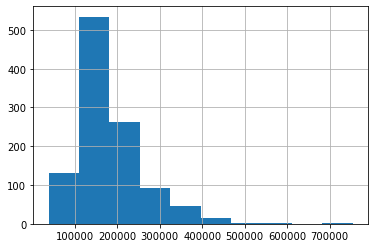

In [16]:
y_train.hist()

In [17]:
y_dif = np.abs(y_test-y_pred )

In [18]:
y_dif.sort_values(ascending=False)[0:20]

898     165049.761439
1046    147935.538050
1169    135292.047209
440     121323.798756
1181     96325.921519
629      90408.507507
375      84532.318370
955      69763.147913
944      69325.641096
970      66953.207468
70       63689.126913
798      61297.737923
1131     57466.165818
1211     54284.944441
199      53835.389464
386      49163.415432
618      46864.445380
107      45278.339905
30       45214.872766
595      43786.221702
Name: SalePrice, dtype: float64

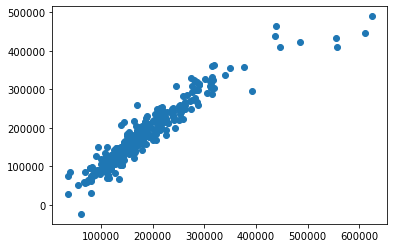

In [19]:
plt.scatter(y_test, y_pred)

In [20]:
# try ridge and lasso regresions
from sklearn.linear_model import Ridge

model2 = Ridge()
param_grid = {'alpha': np.arange(0.01, 300)}
model2_cv = GridSearchCV(model2, param_grid, cv=5)

model2_cv.fit(X_train, y_train)
model2_cv.best_params_

{'alpha': 9.01}

In [21]:
model3 = Ridge(alpha= 9.01)
model3.fit(X_train, y_train)

print('cv_score:', np.mean(cross_val_score(model3, X_train, y_train, cv=5)))

y_pred =model3.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

cv_score: 0.8544425268098952
MSE: 679539339.6444254
RMSE: 26067.975365271952
